# **What Wins Major Golf Tournaments?**

### A Data Science Tutorial by Ben Dobbins

The Masters, The PGA Championship, The U.S. Open and The Open Championship. These are the four major tournaments in golf, much like the four major tennis tournaments that occur each year. Although Tiger Woods may have made it seem easy to take home a first place medal in these tournaments, the reality is that it requires a perfect storm of luck, skill, confidence and poise. In fact, only three golfers in the history of the sport have won a major more than 10 times, and only 5 have won each major at least once. This begs the question, what does one have to do to win a major tournament? Drive well? Putt well? Wear coordinated socks?

In this tutorial, we will use data science techniques and raw data on the last three years of majors from datagolf.com to try and gain some insight into what a player has to do to win a major tournament. The purpose of this is to provide you with a basic (or more in-depth if you have prior experience) idea of what data science entails, the processes behind it, and why it is useful. Who knows, maybe we'll even discover the secret to winning golf majors and you'll become the next Tiger Woods while we're at it.

Before we get started, I want to briefly mention the imports below. pandas, numpy and matplotlib are all ubiquitous tools in data science, and they are all extremely useful. pandas allows data scientists to read data from outside sources into a dataframe, which makes it easier to manipulate, clean and do analysis on the data. numpy is a great tool for manipulating data and doing different computations that are outside the scope of base Python. matplotlib is a fantastic tool for visualizing data with graphs to find trends and relationships between variables. More information about each of those libraries can be found below:

pandas: https://pandas.pydata.org/, https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/#:~:text=The%20primary%20two%20components%20of,of%20a%20collection%20of%20Series.

numpy: https://numpy.org/, https://www.w3schools.com/python/numpy/numpy_intro.asp

matplotlib: https://matplotlib.org/, https://www.simplilearn.com/tutorials/python-tutorial/matplotlib

Now, with the introduction out of the way, let's jump into the first step in the data science process: data collection.

In [12]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, glob
pd.options.mode.chained_assignment = None

## **Data Collection**

The first step in the data science process is to collect some data. Naturally, one cannot perform data science without the data. Then it would just be science, which is for nerds. There are many different ways you can collect data, depending on the format in which the data is stored. Sometimes, data is stored in the html of websites, in which case tools like beautifulsoup and requests can be used to extract the data from the html. Data can also be stored in databases (duh), the most common of which are sql databases, which rely on the sequential query language to perform tasks. Those databases can also be accessed using certain Python tools.

Beautifulsoup & requests info: https://www.crummy.com/software/BeautifulSoup/bs4/doc/, https://pypi.org/project/requests/, https://medium.com/analytics-vidhya/introduction-to-web-scrapping-with-beautiful-soup-and-requests-9bb1ff389f55

SQL info: https://www.w3schools.com/sql/sql_intro.asp, https://www.altexsoft.com/blog/business/comparing-database-management-systems-mysql-postgresql-mssql-server-mongodb-elasticsearch-and-others/

For our purposes, we will be using data stored in csv (comma-separated-value, info can be found [HERE](https://ecommerce-platforms.com/glossary/comma-separated-values-csv)) files that come from the raw data archives of the datagolf.com website. datagolf.com tracks certain statistics for professional golfers across most (if not all) of the tournaments that they play each year. It is a cool website to check out if you are interested in data science or golf, because they use the raw data that they collect to perform different types of analysis, much like what we will be doing in this tutorial.

As mentioned above, the files I am using here are from the raw data archives of datagolf.com, and can be downloaded if you have an account. I have downloaded the files for each major over the last three years. The files are stored in a folder called "raw-data", which is in the same directory as this file. In the code below, I read the data from those files into a pandas dataframe, which you can learn a little more about with a simple google search. The third line is the one that reads in the data, and while it is explained in detail at the link below, I will provide some context. pandas has a read_csv() function that reads data from a csv file into a dataframe. concat() joins two dataframes together. So, essentially, we are just creating a dataframe for each csv file in the raw-data folder and then joining them together. Afterwards, we reset the index (gets messed up during concat()) and rename the columns of the dataframe, which just tidies things up a bit. The first few rows of the dataframe are displayed below the code.

https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/#:~:text=2.,and%20merge%20them%20into%20DataFrame.

In [13]:
path = './raw-data/'
AMT_TOURNAMENTS = 12
# Read in data from all csv files, create a dataframe that contains all data
data = pd.concat(map(pd.read_csv, glob.glob(path + '*.csv')))

# Reset index and rename columns
data.reset_index(drop=True, inplace=True)
data.columns = ['tour', 'year', 'season', 'event_name', 'event_id', 'player_name', 'player_id', 'finish', 'round', 'course_name', 'course_num', 'course_par', 'start_hole', 'teetime',
                'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots']

data.head()

,tour,year,season,event_name,event_id,player_name,player_id,finish,round,course_name,...,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots
0,pga,2021,2021,The Masters #2,536,"Matsuyama, Hideki",13562,1,1,Augusta National Golf Club,...,3.207,5.523,283.8,0.714,0.722,1.000,44.273,38.172,7.0,3.0
1,pga,2021,2021,The Masters #2,536,"Matsuyama, Hideki",13562,1,2,Augusta National Golf Club,...,3.062,1.330,301.9,0.786,0.778,0.429,38.792,38.045,3.0,3.0
2,pga,2021,2021,The Masters #2,536,"Matsuyama, Hideki",13562,1,3,Augusta National Golf Club,...,5.630,7.426,298.5,0.357,0.667,0.714,50.730,10.420,7.0,3.0
3,pga,2021,2021,The Masters #2,536,"Matsuyama, Hideki",13562,1,4,Augusta National Golf Club,...,1.103,-0.370,304.3,0.714,0.611,0.636,166.794,36.691,4.0,5.0
4,pga,2021,2021,The Masters #2,536,"Zalatoris, Will",19428,2,1,Augusta National Golf Club,...,2.985,4.523,302.0,0.643,0.778,0.571,35.775,38.183,6.0,2.0


## **Data Processing**

Now that we have collected our data and put it into a dataframe, it is time to clean it up a bit. Think of it like your bedroom. If your bedroom is a mess and you need to find your keys, searching for them might be a very inefficient process that takes a lot of time. However, if your room is clean and organized, you should be able to find your keys in no time. Similarly, messy data makes performing analysis, visualization and testing more difficult and less efficient, while tidy data avoids those problems.

We always want variables as columns and observations as rows in our tables when doing data science tasks. If the data is not already in that format, we can use tools like melting, casting and string splitting to clean it up. Those tools are described more in-depth [HERE](https://gagneurlab.github.io/dataviz/tidy-data-and-combining-tables.html). In this case, our data is already in the correct format, so we won't have to do any of those things.

The first thing we will do to process the data is create a table that just keeps track of which player maps to which player id. This is not absolutely necessary, since this information is already available in our data table, but having this table makes things a little easier. We can also see how to create a new dataframe from columns of a different dataframe in pandas. Simply assign the new dataframe to the old dataframe indexed with a list of the columns you want to copy. The drop_duplicates() function is rather intuitive; it drops any duplicate rows from the new table.

In [14]:
# Create a new table with player names and IDs
players = data[['player_name', 'player_id']].drop_duplicates()
# Reset the index of the table
players.reset_index(drop=True, inplace=True)
players.head()

,player_name,player_id
0,"Matsuyama, Hideki",13562
1,"Zalatoris, Will",19428
2,"Spieth, Jordan",14636
3,"Schauffele, Xander",19895
4,"Leishman, Marc",7649


Now that we have a table matching all of the players with their ids, it might also be useful to have a tournament table matching each event to the course, course id, and other course info. So, we create the events table, which keeps track of info about each event. Next, some of the event names change from year to year in our table (in reality they are called the same thing every year), so the third and fourth lines of code in the block below ensure that is corrected, since it is important that similar data is homogeneous. 

After sorting the table so that it is organized by year and tournament, we run into an issue. For some reason, datagolf.com uses the same event id for some majors and different event ids for others. For example, The Masters 2021 and 2022 both have event ids of 14 while 2023 has an id of 536. We want the ids to be unique identifiers for each of the events, so we need to fix this. That is where the nested for loop below comes into play. If you do not have much experience with pandas, do not worry too much about exactly what the code is doing, as it is a little complicated. The gist is that the events table has given a unique index to each event, and we want to use that index as the new event id. So, we loop through each event (in each year) and set the event id of every row in the data table corresponding to that event to the new id, which is the index of that event in the events table. After that is finished, each event now has a unique id from 0 to 11.

We now have a table that keeps track of the events. Also, if you would like to know more about accessing certain values in a pandas dataframe, the link below gives some good insight.

https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

In [15]:
# Create a new table with information about each of the events in the dataset
events = data[['event_id', 'event_name', 'course_num', 'course_name', 'course_par', 'year']].drop_duplicates()
events.columns = ['id', 'event_name', 'course_num', 'course_name', 'course_par', 'year']

# Synchronize event names
events['event_name'] = events['event_name'].apply(lambda x: "The Masters" if "Masters" in x else x)
events['event_name'] = events['event_name'].apply(lambda x: "U.S. Open" if "U.S." in x else x)

# Sort dataset so that events are grouped and in chronological order
# Reset index so that it is a unique identifier for each event
events.sort_values(by=['event_name', 'year'], inplace=True)
events = events.reset_index(drop=True)

# For each event in each year
for event in data['event_id'].unique():
    for year in data['year'].unique():
        if not events.loc[(events['id'] == event) & (events['year'] == year)].empty:
            # Set the event id in the data table to the index of the event in the events table 
            data.loc[(data['event_id'] == event) & (data['year'] == year), 'event_id'] = events.loc[(events['id'] == event) & (events['year'] == year)].index[0]

# Make the index the event id for each event
events['id'] = events.index
events = events.set_index('id')

events['tournament_id'] = events['event_name'].apply(lambda x: 'P' if 'PGA' in str(x) else 'M' if 'Masters' in str(x) else 'U' if 'U.S.' in str(x) else 'O')

events

,event_name,course_num,course_name,course_par,year,tournament_id
id,,,,,,
0,PGA Championship,697,Ocean Course at Kiawah Island,72,2021,P
1,PGA Championship,611,Southern Hills Country Club,70,2022,P
2,PGA Championship,514,Oak Hill Country Club,70,2023,P
3,The Masters,14,Augusta National Golf Club,72,2021,M
4,The Masters,14,Augusta National Golf Club,72,2022,M
5,The Masters,14,Augusta National Golf Club,72,2023,M
6,The Open Championship,778,Royal St. George's GC,70,2021,O
7,The Open Championship,668,St. Andrews Links (Old Course),72,2022,O
8,The Open Championship,724,Royal Liverpool,71,2023,O


One important thing to note before we move forward is that golf tournaments are played over four days, with one round of 18 holes being played each day. The data from the csv files keeps track of statistics for each round that each player plays in a tournament. This can be useful in some instances, but it is also useful to have an average of each player's statistics over the whole tournament. This is why we are creating the finishes table below.

However, we need to do a few more things to the data table before creating the finishes table. First, to get a player's net score over a tournament, we need their net score over each round. Net score is the round score minus the course par for that round. Course par is essentially the average score for the course, so net score is how far below or above that you were (learn more about golf scoring [HERE](https://www.socialgolfaustralia.com.au/golf-fundamentals/the-golf-beginners-guide-to-scoring/)). We also clean up the finish column a bit because it includes non-integer values. Ties happen a lot in golf, so we remove the 'T's from some observations. There is also a cut after the second day of golf tournaments, where those above a certain score threshold do not qualify for the final two days. Those players do not get a ranking, so we mark their finish as NaN.

We then create our table with total tournament statistics. We get the total statistics by grouping them by event id and player id (meaning every round a certain player played at a certain event) and then taking the average or the sum, depending on the statistic. The first few rows of this table are displayed below.

I have not yet mentioned missing data, which I want to quickly touch on before moving to the data analysis and visualization part of the tutorial. Some data is often missing from datasets, and it is important to know how to deal with this. There are different types of missing data (MCAR, MAR, MNAR), which are discussed [HERE](https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values), and the different ways to replace those datapoints are also discussed on that site. The most common way to deal with missing data is by simply filling in the missing spots with NULL or NaN. Since the missing data was stored as null in the csv files, pandas already converted those values to NaN when it created the first dataframe, so we do not need to do anything to handle missing data.

https://sparkbyexamples.com/pandas/pandas-groupby-multiple-columns/

In [16]:
# Create a new column in the data table that tracks net round score, which is round score minus course par
data['net_round_score'] = data['round_score'] - data['course_par']
# Remove any T's (for tie) from the rankings
data['finish'] = data['finish'].apply(lambda x: str(x).replace('T', ''))
# Set any non-numeric values to NaN
data['finish'] = data['finish'].apply(lambda x: np.nan if not x.isdigit() else int(x))


# Create a new table with tournament data
finishes = data[['event_id', 'year', 'player_name', 'player_id', 'finish', 'net_round_score', 'great_shots', 'poor_shots']]

# The stats we want to average over each event for each player
averages = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots']
# The stats we want to sum over each event for each player
sums = ['great_shots', 'poor_shots', 'net_round_score']

# Loop through each feature to be averaged
for feature in averages:
    # Group the data by event and player so that we can average over each event for each player (i.e. each row is a player's average performance over a single event)
    avg = data.groupby(['event_id', 'player_id'])[feature].mean()
    # Add the new stats to the finishes table
    finishes[feature] = finishes.apply(lambda x: avg.loc[x['event_id'], x['player_id']], axis=1)

# Same as above, but for stats that should be summed instead of averaged
for feature in sums:
    sum = finishes.groupby(['player_id', 'event_id'])[feature].sum()
    finishes[feature] = finishes.apply(lambda x: sum.loc[x['player_id'], x['event_id']], axis=1)

# Set tournament id (letter indicating which type of tournament)
finishes['tournament_id'] = finishes['event_id'].apply(lambda x: events.loc[x, 'tournament_id'])

# Tidy table a bit
finishes = finishes.rename(columns={'net_round_score': 'net_score'})
finishes.drop_duplicates(inplace=True)
finishes.reset_index(drop=True, inplace=True)

finishes.head()

,event_id,year,player_name,player_id,finish,net_score,great_shots,poor_shots,sg_putt,sg_arg,...,sg_ott,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,tournament_id
0,3,2021,"Matsuyama, Hideki",13562,1.0,-10,21.0,14.0,0.22650,1.40100,...,0.35000,3.25050,3.47725,297.125,0.64275,0.69450,0.69475,75.147250,30.83200,M
1,3,2021,"Zalatoris, Will",19428,2.0,-9,19.0,13.0,1.21600,0.06750,...,0.97575,2.01075,3.22725,305.125,0.69625,0.73625,0.54900,71.776500,37.97325,M
2,3,2021,"Spieth, Jordan",14636,3.0,-7,15.0,13.0,-0.87575,1.69925,...,0.78425,3.60300,2.72725,303.250,0.75025,0.77800,0.52500,63.049250,31.62350,M
3,3,2021,"Schauffele, Xander",19895,3.0,-7,21.0,21.0,-0.26725,1.51200,...,0.83150,2.99400,2.72725,312.925,0.73200,0.70825,0.63525,59.196333,30.98175,M
4,3,2021,"Leishman, Marc",7649,5.0,-6,9.0,8.0,0.43525,1.02850,...,-0.45325,2.04175,2.47725,295.550,0.51800,0.63875,0.64275,48.157750,31.43550,M


## **Exploratory Analysis and Data Visualization**

So, we have our data and we have processed and organized it, making it nice and neat. What do we do with it now? Well, the whole purpose of data science is to be able to extract information from the data about trends, relationships, etc. Before we can start making claims about these types of things, we need to analyze the data to get a feel for where the trends are and how different variables relate. That is what we will be doing in this section.

### Who Makes the Best Shots?

Let's start our analysis off with something simple, to get the feel of things. We have a metric in our finishes table that keeps track of how many great shots and poor shots a player hits over the course of a tournament. It would make sense if the top finishers made more great shots and less poor shots than the lower finishers every tournament. Let's make a plot to test that theory.

Info about creating bar plots: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/#

Text(0.5, 1.0, 'Average Amount of Great Shots and Poor Shots Per Major by Finish')

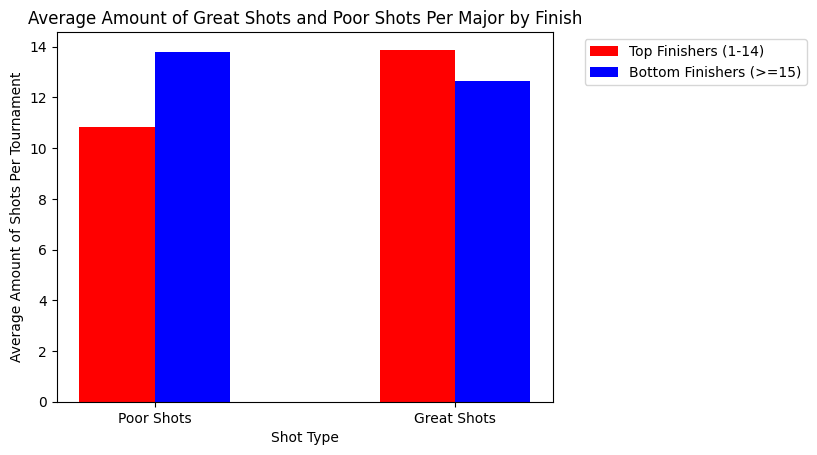

In [17]:
# Create two different subtables from the finishes table, one for top finishers (1-14) and one for bottom finishers (>=15)
top_finishers = finishes[finishes['finish'] < 15]
bottom_finishers = finishes[finishes['finish'] >= 15]

barWidth = 0.25

br1 = [0, 1]
br2 = [x + barWidth for x in br1]

# Create a bar plot of the average amount of great shots and poor shots per tournament for top finishers and bottom finishers
plt.bar(br1, [top_finishers['poor_shots'].mean(), top_finishers['great_shots'].mean()], color='r', width=barWidth, label='Top Finishers (1-14)')
plt.bar(br2, [bottom_finishers['poor_shots'].mean(), bottom_finishers['great_shots'].mean()], color='b', width=barWidth, label='Bottom Finishers (>=15)')

plt.xticks([r + barWidth / 2 for r in range(len(br1))], ['Poor Shots', 'Great Shots'])
plt.ylabel('Average Amount of Shots Per Tournament')
plt.xlabel('Shot Type')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Average Amount of Great Shots and Poor Shots Per Major by Finish')
plt.show()

Clearly, our theory was correct. The top finishers execute more great shots and less poor shots in every tournament, no surprise. However, we can extract another interesting piece of information from this plot. Just eyeballing it, it looks like top finishers make about 14 great shots per tournament as opposed to about 13 for bottom finishers, which is a 1 great shot differential. The poor shots metric has a lot more separation, with top finishers making about 11 poor shots on average and bottom finishers making about 14, which is a 3 poor shot differential. We could interpret the higher differential of poor shots to mean that preventing poor shots is more important to winning than making great shots. Of course, we cannot say that for sure, but that is the beauty of data visualization: it gives us an idea of what hypotheses we should be testing.

### Driving Distance

Let's do another rather simple example of data visualization. This time, we will try to determine what the distribution of driving distances looks like for players in majors. Driving distance has always been a big advantage for some golfers, especially in recent years with some hitting the ball over 325 yards consistently. Let's see if a greater number of pros in majors tend to be heavy hitters, or if the advantage given by driving distance isn't really that big of a factor after all.

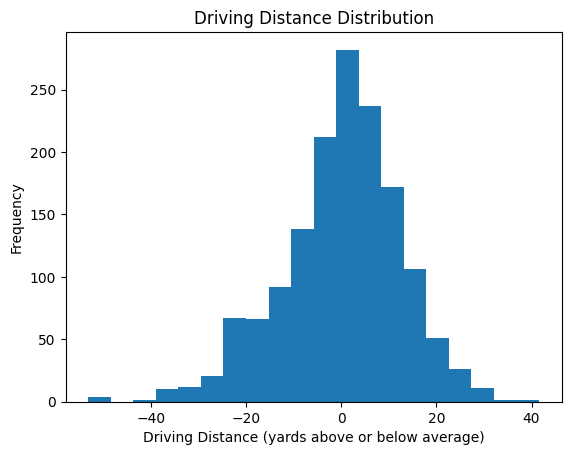

In [64]:
# Create a histogram of mean-centered driving distance for players across all tournaments
plt.hist(finishes['driving_dist'] - finishes['driving_dist'].mean(), bins=20)
plt.xlabel('Driving Distance (yards above or below average)')
plt.ylabel('Frequency')
plt.title('Driving Distance Distribution')
plt.show()

You'll notice that while creating the graph, I subtracted the mean driving distance from each individual data point. This is a concept called mean-centering, and it is useful in this case to visually show how far most golfers in majors are from the average distance. Learn more about the benefits of mean-centering and standardizing [HERE](https://www.goldsteinepi.com/blog/thewhyandwhenofcenteringcontinuouspredictorsinregressionmodeling/index.html#:~:text=Centering%20a%20variable%20moves%20its,variable%20by%20its%20standard%20deviation).

The graph is a histogram plot of mean-centered driving distances. Histograms are described [HERE](https://www.investopedia.com/terms/h/histogram.asp#:~:text=A%20histogram%20is%20a%20graph,how%20often%20that%20variable%20appears) for those who are not familiar. As we can see, the plot looks very similar to a normal distribution, with maybe a slight skew to the left. The normal distribution is a probability distribution that is symmetric about the mean. The data being skewed to the left means there are a few more points to the left of the mean than to the right. Learn more about skewness [HERE](https://www.investopedia.com/terms/s/skewness.asp#:~:text=Investopedia%20%2F%20Theresa%20Chiechi-,What%20Is%20Skewness%3F,median%20on%20a%20bell%20curve.). Essentially, this graph just tells us that most golfers in majors are around the average driving distance, meaning it probably does not have a ton of impact on which golfers make majors.

### The Best Around

Okay, so we've created some simple plots and we understand a little bit about what we are doing. Let's get a little more complicated. One good way to figure out what statistics contribute the most to major success is to look at the stats of the player who consistently performs the best across majors. Below, code is written to identify that player and then make three plots based on their stats. In our case, that player will end up being Scottie Scheffler, the current world #1 golfer. We will plot his stats against the average, to see what he is doing better that keeps him at the top of every major.

As an aside, this part will be discussing metrics such as strokes gained, greens in regulation and scrambling. All of these metrics are discussed in detail [HERE](https://www.golfshake.com/news/view/14933/What_Do_Golf_Stats_Mean.html), should you be curious to learn about what they mean.

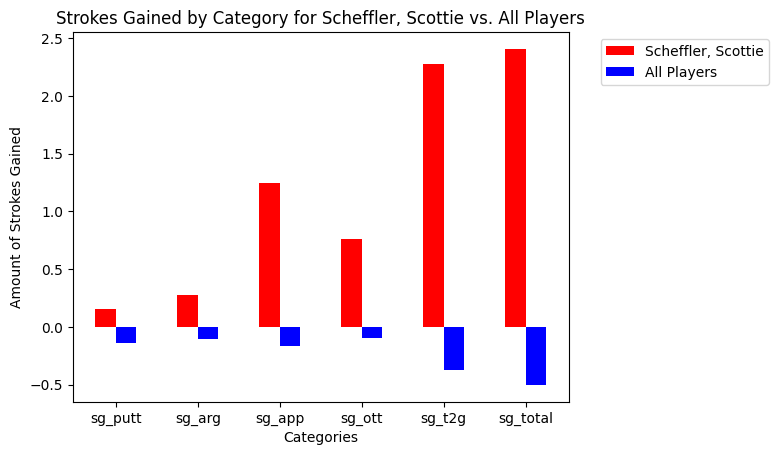

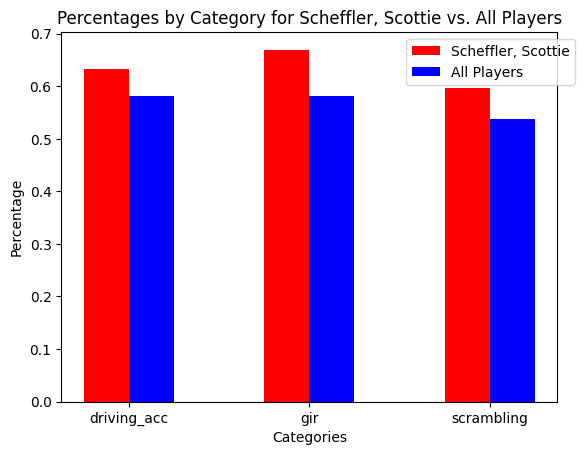

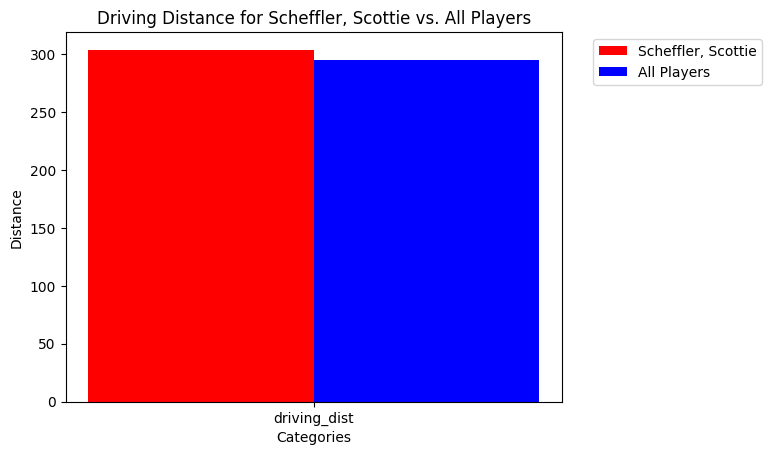

In [19]:
lowest_finishes = 1000
lowest_finishes_player = None

# Loop through each player
for player in finishes['player_id'].unique():
    # Create a table of that player's finishes over the last 12 tournaments
    player_finishes = finishes[finishes['player_id'] == player]
    # If the player played in at least 10 of the 12 tournaments, made all cuts, and has a lower sum of finishes than the current lowest, set the lowest to that player
    if player_finishes.__len__() >= 10 and np.nan not in player_finishes['finish'].unique() and player_finishes['finish'].sum() < lowest_finishes:
        lowest_finishes = player_finishes['finish'].sum()
        lowest_finishes_player = player

categories = [['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total'], ['driving_acc', 'gir', 'scrambling'], ['driving_dist']]
iters = 0
lowest_player_avgs = []
all_player_avgs = []

for list in categories:
    for category in list:
        # Average each stat for the player with the lowest sum of finishes and add them to the list
        lowest_player_avgs.append(finishes[finishes['player_id'] == lowest_finishes_player][category].mean())
        # Average each stat for all players and add them to the list
        all_player_avgs.append(finishes[category].mean())


    br1 = np.arange(len(list))
    br2 = [x + barWidth for x in br1]

    # Create a bar plot of the current set of stats for the lowest finisher vs all players
    plt.bar(br1, lowest_player_avgs, color='r', width=barWidth, label=players[players['player_id'] == lowest_finishes_player]['player_name'].values[0])
    plt.bar(br2, all_player_avgs, color='b', width=barWidth, label='All Players')

    plt.xticks([r + barWidth - barWidth / 2 for r in range(len(list))], list)
    plt.xlabel('Categories')
    # Change labels based on iteration
    if iters == 0:
        plt.ylabel('Amount of Strokes Gained')
        plt.title('Strokes Gained by Category for ' + players[players['player_id'] == lowest_finishes_player]['player_name'].values[0] + ' vs. All Players')
    elif iters == 1:
        plt.ylabel('Percentage')
        plt.title('Percentages by Category for ' + players[players['player_id'] == lowest_finishes_player]['player_name'].values[0] + ' vs. All Players')
    else:
        plt.ylabel('Distance')
        plt.title('Driving Distance for ' + players[players['player_id'] == lowest_finishes_player]['player_name'].values[0] + ' vs. All Players')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

    lowest_player_avgs = []
    all_player_avgs = []
    iters += 1

We can take a few things away from the graphs above. First of all, Scottie Scheffler is really good at golf. He is well above average in just about every metric. However, that conclusion doesn't help us much, so what useful conclusions can we draw? Well, it seems like Scheffler gains way more strokes from his tee to green and approach games, meaning those could be the most important stats for staying consistently good. He also hits about 10% more greens in regulation than the average. Keeping those things in mind, let's do one more analysis task that should give us some more insight about the most important stats.

### Winners and Losers

In this section, we will plot certain stats against others and compare the values of those who won tournaments against those who lost tournaments. This should give us a good idea of what the winners are doing much better than the losers. Each graph will be a scatter plot with one stat on the y-axis and one on the x-axis. Red points are winners and blue points are losers. Scatter plots are great tools for plotting many observations and trying to see a trend. Learn more about them [HERE](https://www.tibco.com/reference-center/what-is-a-scatter-chart#:~:text=A%20scatter%20chart%2C%20also%20called,in%20almost%20any%20other%20form.).

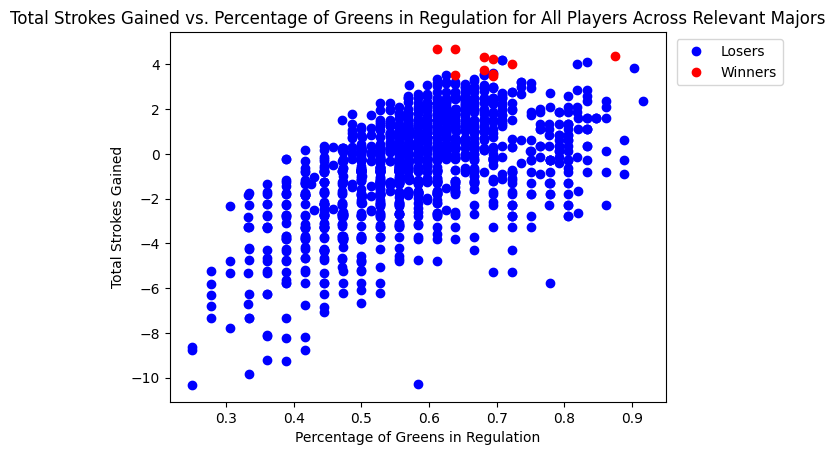

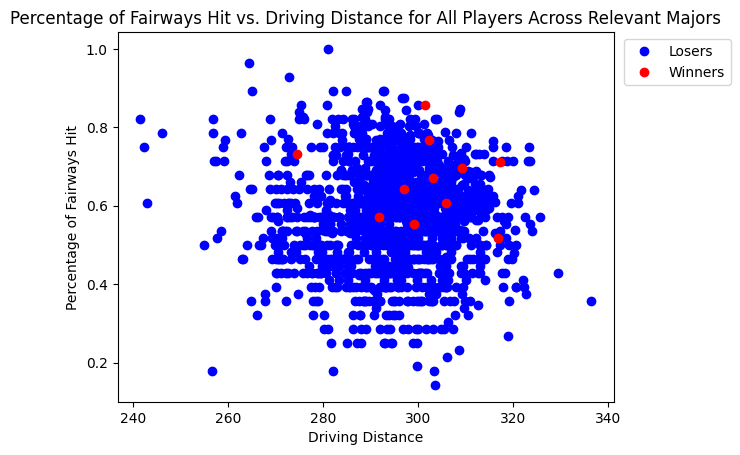

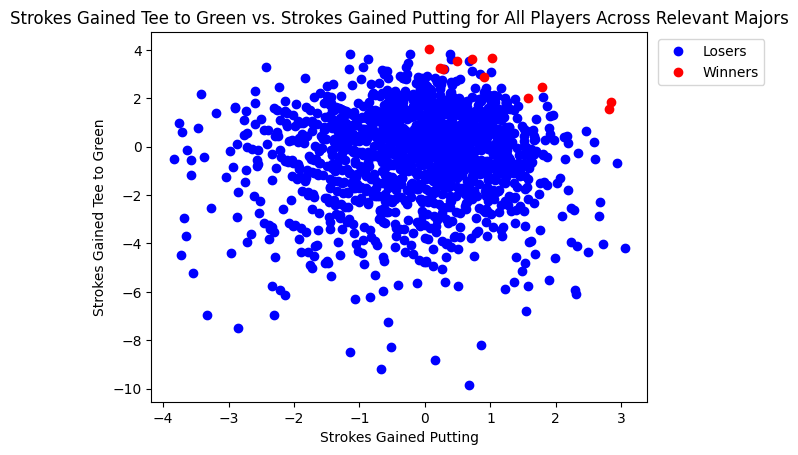

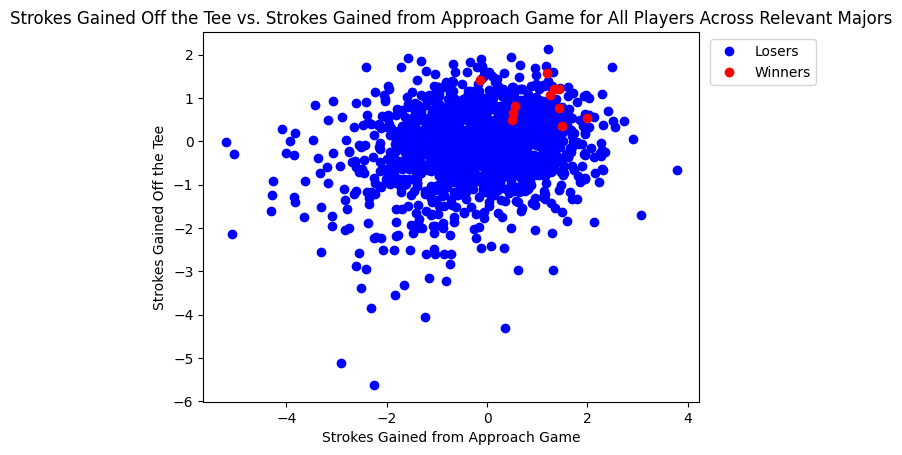

In [20]:
# Create two tables, one for winners and one for losers
winners = finishes[finishes['finish'] == 1]
losers = finishes[finishes['finish'] != 1]

categories = [['gir', 'sg_total', 'Percentage of Greens in Regulation', 'Total Strokes Gained'], ['driving_dist', 'driving_acc', 'Driving Distance', 'Percentage of Fairways Hit'],
              ['sg_putt', 'sg_t2g', 'Strokes Gained Putting', 'Strokes Gained Tee to Green'], ['sg_app', 'sg_ott', 'Strokes Gained from Approach Game', 'Strokes Gained Off the Tee']]

# Scatter plot losers and winners for each set of categories
for category in categories:
    plt.plot(losers[category[0]], losers[category[1]], 'o', label='Losers', color='blue')
    plt.plot(winners[category[0]], winners[category[1]], 'o', label='Winners', color='red')
    plt.xlabel(category[2])
    plt.ylabel(category[3])
    plt.legend(bbox_to_anchor=(1.25, 1))
    plt.title(category[3] + ' vs. ' + category[2] + ' for All Players Across Relevant Majors')
    plt.show()

Okay, so what are we looking at in the above graphs? Let's break them down one-by-one.

The first graph plots total strokes gained vs percentage of greens in regulation. Now, total strokes gained is a measure of how well you played compared to everyone else, so the winner of a tournament will always have the most total strokes gained at the end. Greens in regulation is a stat that is described in an article linked above. We see that most winners are around average in greens in regulation, meaning there are probably more important stats. So we move on.

The second graph plots percentage of fairways hit vs driving distance. Earlier, when we looked at a histogram of the distribution of driving distances, we concluded that it probably is not too important to winning and losing. Here, we get confirmation of that, since there seems to be little correlation between driving distance or fairways hit and winning.

The third graph plots strokes gained from tee to green vs strokes gained putting, and this is the most telling graph in my opinion. We can clearly see that just about every winner gains way more strokes from tee to green than losers, and those that don't gain as many strokes from tee to green gain them back with putting. In the last section, we noticed that the most winning player is consistently great from tee to green, and that evidence along with this graph tells us that strokes gained from tee to green is a very important stat.

The fourth graph plots strokes gained off the tee against strikes gained from approach game. It seems like winners do well off the tee, but not the best, and similar for the approach game.

All in all, I think the biggest thing we can gather from these graphs is that the most important stat for consistently winning major golf tournaments seems to be strokes gained from tee to green. In the next part of the tutorial, we will do some machine learning based on the data, and then test this hypothesis.

## **Machine Learning and Hypothesis Testing**

Now it's time to get to the fun stuff. In this part of the tutorial, we will be creating models that try to predict how well a player will score based on their stats for a given round/tournament. Here, we get to use the analysis from the last section and the testing from this section to form conclusions about what we want to know.

First, we will be doing some linear regression, which shows linear trends in data. We essentially create a best fit line that maps each input to a predicted output, and the best linear regressions have predicted outputs that are very similar to the actual outputs. One of the best Python libraries for doing linear regression is sklearn. They have a lot of useful machine learning tools.

Learn more about [linear regression](https://www.ibm.com/topics/linear-regression#:~:text=Linear%20regression%20analysis%20is%20used,is%20called%20the%20independent%20variable.) and [sklearn](https://scikit-learn.org/stable/).

In [ ]:
from sklearn import linear_model as lm

### Univariate Linear Regression

First, we will do a linear regression that we already know the result of, just to get the feel of it. I mentioned earlier that strokes gained total is a measure of how well a player played, so higher strokes gained total equates to lower scores. We will create a linear regression here with strokes gained as our input and round score as our output to showcase that relationship.

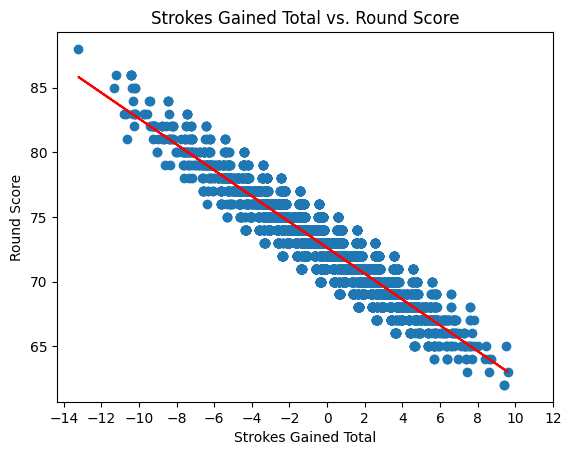

Score predictions for strokes gained of -4, -2, 0, 2, 4 respectively: 
 [[76.61268984]
 [74.61270837]
 [72.61272691]
 [70.61274544]
 [68.61276398]]
Model intercept and coefficient respectively:  [72.61272691] [[-0.99999073]]


In [67]:
# Create a linear regression model and fit it with the strokes gained and round score data
model = lm.LinearRegression()
model.fit(data[['sg_total']].values, data[['round_score']].values)

# Scatter plot of strokes gained vs. round score
plt.plot(data[['sg_total']], data[['round_score']], 'o')
# Plot the linear regression best fit line (predicted round score based on strokes gained)
plt.plot(data[['sg_total']], model.predict(data[['sg_total']].values), color='red')
plt.xticks(np.arange(-14, 14, 2))
plt.xlabel('Strokes Gained Total')
plt.ylabel('Round Score')
plt.title('Strokes Gained Total vs. Round Score')
plt.show()

# Predict round score based on certain amounts of strokes gained
print("Score predictions for strokes gained of -4, -2, 0, 2, 4 respectively: \n", model.predict([[-4], [-2], [0], [2], [4]]))
# Print the model intercept and coefficient
print("Model intercept and coefficient respectively: ", model.intercept_, model.coef_)

Clearly, the data follows a very linear trend, and the coefficient of our model shows that each stroke gained is essentially one less in your round score. We have some predictions above for different strokes gained values, and they match up with the linear trend of the data. Cool beans. Let's get a little more advanced.

### Multivariate Linear Regression/Gradient Descent

One of the most fundamental machine learning algorithms is gradient descent. In this case, we will use it to train a linear regression model with multiple parameters. The idea is that we have a function called a loss function. That function measures how much error there is in the current predictions from the model. We want the minimum error possible, so we want to minimize that function. If you think back to calculus, you may recall that the best way to minimize a function is to take its derivative. With gradient descent, we take the gradient (Multi-D derivative) of the loss function with respect to each parameter, and increase each parameter by a small amount in the opposite direction of the gradient (gradient always points in direction of steepest ascent, and we want to descend). We repeat this until we have the minimum error possible in our model. Learn more about gradient descent [HERE](https://builtin.com/data-science/gradient-descent).

There are many different loss functions as well, each of which handle error slightly differently. Mean Squared Error is one of the most popular loss functions for linear regression because it often creates a good model. Mean Absolute Error is another good loss function for linear regression which gives less weight to outlier points. More information about different loss functions can be found [HERE](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23).

Below, we create a gradient descent algorithm for multiple linear regression. We will use batch gradient descent instead of stochastic because we have a smaller data set, so batch will not be that much slower than stochastic. It will also be more accurate. More about batch vs stochastic gradient descent [HERE](https://www.geeksforgeeks.org/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/). We then try to use that model to predict the round score of different players based on a set of statistics from that round.

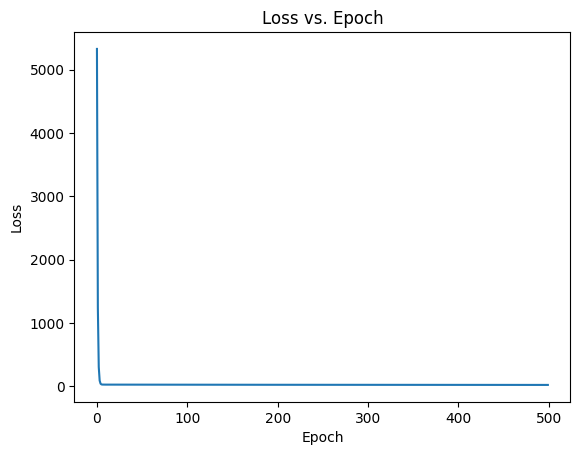

Predicted score:  71  |  Actual score:  68
Predicted score:  76  |  Actual score:  73
Predicted score:  69  |  Actual score:  74
Predicted score:  67  |  Actual score:  72
Predicted score:  76  |  Actual score:  72
Predicted score:  71  |  Actual score:  71
Predicted score:  77  |  Actual score:  74
Predicted score:  75  |  Actual score:  73
Predicted score:  70  |  Actual score:  70
Predicted score:  73  |  Actual score:  68


In [78]:
# Create a new table with only the columns we want to use for the regression
score_regression = data[['driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots', 'round_score']]
# Drop rows with null values from the new table, as they mess up the gradient descent
score_regression = score_regression.dropna()

# ADAPTED FROM THE grad_descent FUNCTION IN THE LECTURE EXAMPLES
def gradient_descent(X, y, alpha, epochs, lossfn='MSE'):
    # Add a column of ones to the X matrix for the intercept
    X = np.c_[np.ones((X.shape[0], 1)), X]
    num_obs, num_feats = X.shape
    # Initialize theta to be a vector of zeros (one for each feature plus the intercept)
    theta = np.zeros(num_feats)
    loss = np.zeros(epochs)

    # Do gradient descent for the specified number of epochs
    for i in range(epochs):
        # Different update rules for different loss functions
        if lossfn == 'MSE':
            # MSE as loss function
            # Update loss
            loss[i] = (1/num_obs) * np.linalg.norm(X.dot(theta) - y)**2
            # Update gradient
            gradient = (2/num_obs) * X.T.dot(X.dot(theta) - y)
        elif lossfn == 'MAE':
            # MAE as loss function
            loss[i] = (1/num_obs) * np.sum(np.abs(X.dot(theta) - y))
            gradient = (1/num_obs) * X.T.dot(np.sign(X.dot(theta) - y))
        elif lossfn == 'logistic':
            # Logistic loss function
            loss[i] = (1/num_obs) * np.sum(-y * np.log(1 / (1 + np.exp((X.dot(-theta.T))))) - (1 - y) * np.log(1 - 1 / (1 + np.exp((X.dot(-theta.T))))))
            gradient = (1/num_obs) * X.T.dot(1 / (1 + np.exp((X.dot(-theta.T)))) - y)
        else:
            print("Invalid loss function")
            return

        # Update theta using the new gradient multiplied by the learning rate, which is a hyperparameter that ensures we don't take too big or too small of a step
        theta = theta - alpha * gradient

    return theta, loss


# Function for predicting an output based on input and theta
def predict(X, theta):
    return theta[0] + theta[1:].dot(X)


X = score_regression[['driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots']].values
y = score_regression['round_score'].values
E = 500

# Run gradient descent with a learning rate of 0.000008 and 500 epochs
theta, loss = gradient_descent(X, y, 0.000008, E)

# Plot loss vs epoch
plt.plot(range(E), loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()

no_null_data = data.dropna()
# Make 10 predictions for round score based on random rows from the data with the correct stats
for _ in range(10):
    i = np.random.randint(0, len(no_null_data))
    prediction = predict(no_null_data.iloc[i][['driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots']].values, theta)
    print("Predicted score: ", int(np.round(prediction)), ' | ', "Actual score: ", no_null_data.iloc[i]['round_score'])

As you can see, our model is not perfect. This is because there are a lot of factors that go into the score of a round of golf, one of which is luck. These uncontrollable extraneous factors that contribute to the error are called "irreducible error". Every machine learning model has reducible and irreducible error. Reducible error is error with the model itself, which is taken care of if training is done properly. Irreducible error cannot be controlled, which is why we get some variations in our prediction above. However, if you look at the graph, you will see that we have minimized the loss, so we have negated as much reducible error as possible. Learn more about reducible and irreducible error, as well as bias and variance, [HERE](https://www.simplilearn.com/tutorials/machine-learning-tutorial/bias-and-variance#:~:text=Irreducible%20errors%20are%20errors%20which,reduced%20to%20improve%20a%20model.).

This is just an interesting exercise to demonstrate how linear regression can be used to make predictions. Next, I will showcase how logistic regression can also be used to make predictions.

### Logistic Regression

Logistic regression is similar to linear regression, but it is used to classify outputs instead of predict their exact value. In the logistic regression below, we want to predict the probability that a player will win a major tournament based on their stats. We do this by setting the training outputs to 0 if the player did not win and 1 if they did. The algorithm then trains a set of parameters, which, when applied to data, give a prediction for the log odds that the player will win the tournament. The log odds are given by this equation:

$\ln(\frac{p(x)}{1 - p(x)}) = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n = \text{log odds}$

So, the probability of classifying the observation as a 1 is given by:

$p(x) = \frac{e^{log odds}}{1 + e^{log odds}}$

More information about logistic regression can be found [HERE](https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.).

In [68]:
finish_regression = finishes[['finish', 'great_shots', 'poor_shots', 'driving_dist', 'driving_acc', 'gir',
                               'scrambling', 'prox_rgh', 'prox_fw', 'sg_putt', 'sg_t2g', 'sg_app', 'sg_arg', 'sg_ott']]
finish_regression['won'] = finish_regression['finish'].apply(lambda x: 1 if x == 1 else 0)
finish_regression.drop('finish', axis=1, inplace=True)
finish_regression.dropna(inplace=True)

X = finish_regression[['great_shots', 'poor_shots', 'driving_dist', 'driving_acc', 'gir', 'scrambling', 
                       'prox_rgh', 'prox_fw', 'sg_putt', 'sg_t2g', 'sg_app', 'sg_arg', 'sg_ott']].values
y = np.array([1 if x == 1 else 0 for x in finish_regression['won'].values])
E = 50000

theta, loss = gradient_descent(X, y, 0.001, E, lossfn='logistic')

# plt.plot(range(E), loss)

for _ in range(5):
    i = np.random.randint(0, X.shape[0])
    prediction = predict(X[i], theta)
    print("Log odds of placing 1st: {}, Actual first place finish: {}".format(prediction, "No" if y[i] == 0 else "Yes"))
    print("Odds of placing 1st: {} to 1".format(np.exp(prediction)))
    print("Probability of placing 1st: {} %".format((1 / (1 + np.exp(-prediction))) * 100))
    print('-------------------------------------------------------------------------------')

Log odds of placing 1st: -5.630831050801002, Actual first place finish: No
Odds of placing 1st: 0.0035855942778050803 to 1
Probability of placing 1st: 0.3572783724925154 %
-------------------------------------------------------------------------------
Log odds of placing 1st: -8.272520667142981, Actual first place finish: No
Odds of placing 1st: 0.00025544059834712874 to 1
Probability of placing 1st: 0.025537536511106167 %
-------------------------------------------------------------------------------
Log odds of placing 1st: -12.30421628090868, Actual first place finish: No
Odds of placing 1st: 4.532593431238012e-06 to 1
Probability of placing 1st: 0.00045325728869279183 %
-------------------------------------------------------------------------------
Log odds of placing 1st: -7.073141618730605, Actual first place finish: No
Odds of placing 1st: 0.0008475661923170321 to 1
Probability of placing 1st: 0.08468484322158693 %
----------------------------------------------------------------

As you can see, the probabilities of winning are very low. This is the case even for winners, since again, there is a lot of irreducible error involved in a model like this. However, I hope this gives you a good idea of what a proper logistic regression looks like.

### Hypothesis Testing

The purpose of this tutorial was to try to find what stat is the most important for winning major golf tournaments. Throughout our data analysis, it seemed like strokes gained from tee to green is the most important stat. Here, we will test that claim. Our null hypothesis will be that greater strokes gained from tee to green do not improve tournament placement. Our alternative hypothesis will be that greater strokes gained from tee to green do improve tournament placement. More about different types of hypotheses and the errors that are be involved with them can be found [HERE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2996198/#:~:text=A%20type%20I%20error%20(false,actually%20false%20in%20the%20population.)). To test our hypothesis, we will create a linear regression between strokes gained from tee to green and tournament rank, and then check that the p-value is low enough to assert statistical significance (information about p-value [HERE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/#:~:text=The%20P%20value%20is%20defined,groups%20is%20due%20to%20chance.)).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 finish   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     831.0
Date:                Sun, 20 Aug 2023   Prob (F-statistic):          2.18e-120
Time:                        20:18:11   Log-Likelihood:                -2814.4
No. Observations:                 689   AIC:                             5633.
Df Residuals:                     687   BIC:                             5642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.1271      0.633     68.116      0.000      41.884      44.370
sg_t2g       -12.8900      0.447    -28.828      0.000     -13.768     -12.012
==============================================================================
Omnibus:                        6.795   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.855
Skew:                           0.244   Prob(JB):                       0.0325
Kurtosis:                       2.979   Cond. No.                         1.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Finish Rank')

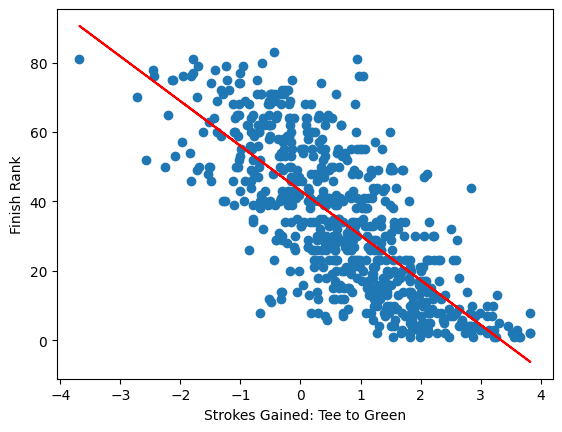

In [76]:
import statsmodels.formula.api as sm

t2g_regression = sm.ols(formula='finish ~ sg_t2g', data=finishes).fit()
display(t2g_regression.summary())

finishes = finishes.dropna()

model.fit(finishes[['sg_t2g']].values, finishes[['finish']].values)
plt.plot(finishes['sg_t2g'].values, finishes['finish'].values, 'o')
plt.plot(finishes['sg_t2g'].values, model.predict(finishes['sg_t2g'].values.reshape(-1, 1)), 'r-')
plt.xlabel('Strokes Gained: Tee to Green')
plt.ylabel('Finish Rank')
plt.title('Finish Rank vs Strokes Gained from Tee to Green in Major Tournaments')
plt.show()

Evidently, there is a definite linear relationship between strokes gained from tee to green and improved tournament ranking. This is supported by the p-value (P>|t| in the table above), which is 0, meaning there is a 0% chance that the relationship between the variables is due to random chance. So, we can accept our alternate hypothesis that improving strokes gained from tee to green improves tournament ranking.

## **Conclusion**

So, we just did all of that data curation, processing, analysis and learning for what? What can we say about what we did? What conclusions can we draw? Well, we set out to try to find the most important statistic for winning major golf tournaments. While we may not have proven that strokes gained from tee to green is the *most* important statistic, we did prove that it is imperative to have a good strokes gained from tee to green score if you want to win a major golf tournament (and just from intuition, I think it is the most important). Anyway, I hope this has been an informative and useful tutorial on data science and winning golf tournaments, and I hope you are a little bit more informed about what it takes to be a better data scientist and a better golfer. Thanks for reading!